In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-dataset/symbols_valid_meta.csv
/kaggle/input/stock-market-dataset/stocks/MTL.csv
/kaggle/input/stock-market-dataset/stocks/JOE.csv
/kaggle/input/stock-market-dataset/stocks/DRE.csv
/kaggle/input/stock-market-dataset/stocks/CTY.csv
/kaggle/input/stock-market-dataset/stocks/AMSF.csv
/kaggle/input/stock-market-dataset/stocks/IMH.csv
/kaggle/input/stock-market-dataset/stocks/GFL.csv
/kaggle/input/stock-market-dataset/stocks/CLM.csv
/kaggle/input/stock-market-dataset/stocks/UBER.csv
/kaggle/input/stock-market-dataset/stocks/NEBU.csv
/kaggle/input/stock-market-dataset/stocks/SGB.csv
/kaggle/input/stock-market-dataset/stocks/WWW.csv
/kaggle/input/stock-market-dataset/stocks/UTSI.csv
/kaggle/input/stock-market-dataset/stocks/PBB.csv
/kaggle/input/stock-market-dataset/stocks/UFCS.csv
/kaggle/input/stock-market-dataset/stocks/ZM.csv
/kaggle/input/stock-market-dataset/stocks/DCPH.csv
/kaggle/input/stock-market-dataset/stocks/HALL.csv
/kaggle/input/stock-market-dataset/s

In [2]:
df = pd.read_csv('/kaggle/input/stock-market-dataset/etfs/PSMB.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-27,12.61,12.61,12.61,12.61,11.250191,0
1,2017-02-28,12.61,12.61,12.61,12.61,11.250191,100
2,2017-03-01,12.61,12.61,12.61,12.61,11.250191,100
3,2017-03-02,12.61,12.61,12.61,12.61,11.250191,100
4,2017-03-03,12.51,12.52,12.51,12.52,11.169895,1000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       780 non-null    object 
 1   Open       780 non-null    float64
 2   High       780 non-null    float64
 3   Low        780 non-null    float64
 4   Close      780 non-null    float64
 5   Adj Close  780 non-null    float64
 6   Volume     780 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 42.8+ KB


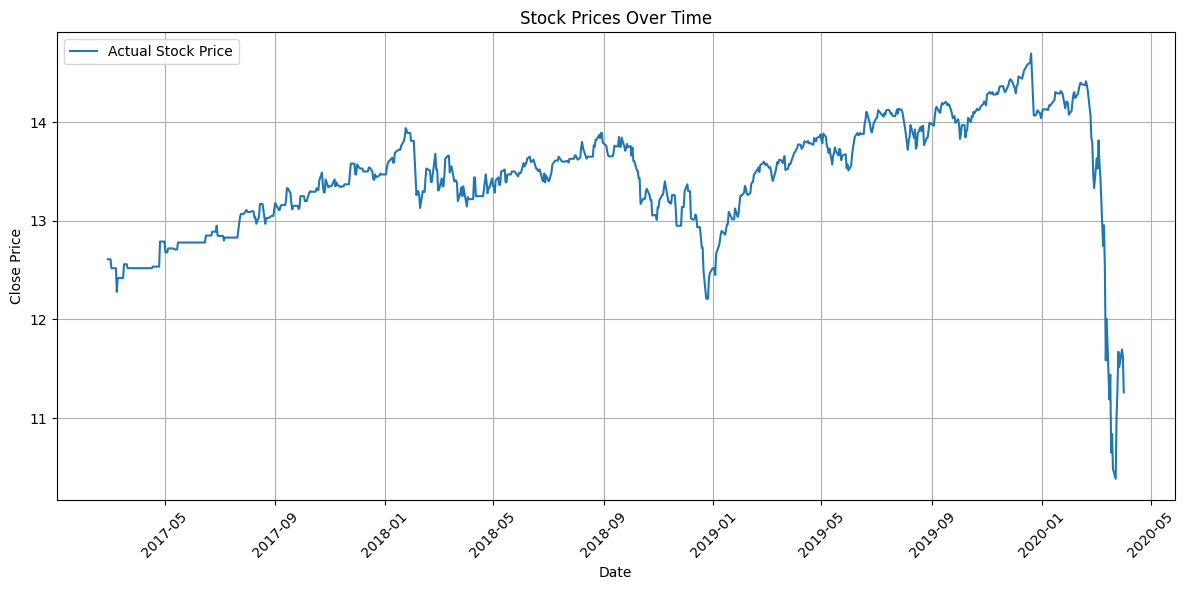

In [5]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# Plot the actual 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Stock Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load data
# Assuming the data is in a DataFrame `df`
# df = pd.read_csv("your_data.csv")  # Uncomment if loading from a CSV file

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Feature extraction from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear
df['ElapsedDays'] = (df['Date'] - df['Date'].min()).dt.days

# Cyclic encoding for Month and DayOfWeek
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Drop the original 'Date' column
df.drop(columns=['Date'], inplace=True)

# Define predictors and target
# Including the new date-related features and original predictors
X = df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month_sin', 'Month_cos', 
        'DayOfWeek_sin', 'DayOfWeek_cos', 'ElapsedDays']]
y = df['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Lasso regression
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

# Results
print("Mean Squared Error:", mse)
print("Lasso Coefficients:", lasso.coef_)

# Optional: Display feature importance
features = X.columns
for feature, coef in zip(features, lasso.coef_):
    print(f"{feature}: {coef}")


Mean Squared Error: 0.01133386173093336
Lasso Coefficients: [ 0.          0.07296956  0.40428357  0.          0.         -0.
  0.         -0.         -0.          0.        ]
Open: 0.0
High: 0.07296955942065178
Low: 0.404283573265484
Volume: 0.0
Year: 0.0
Month_sin: -0.0
Month_cos: 0.0
DayOfWeek_sin: -0.0
DayOfWeek_cos: -0.0
ElapsedDays: 0.0


In [7]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.9720796395626792

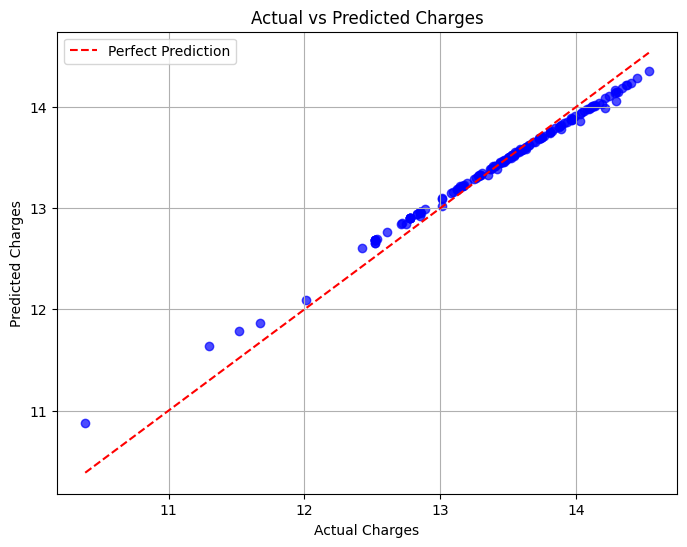

In [8]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.grid(True)
plt.show()

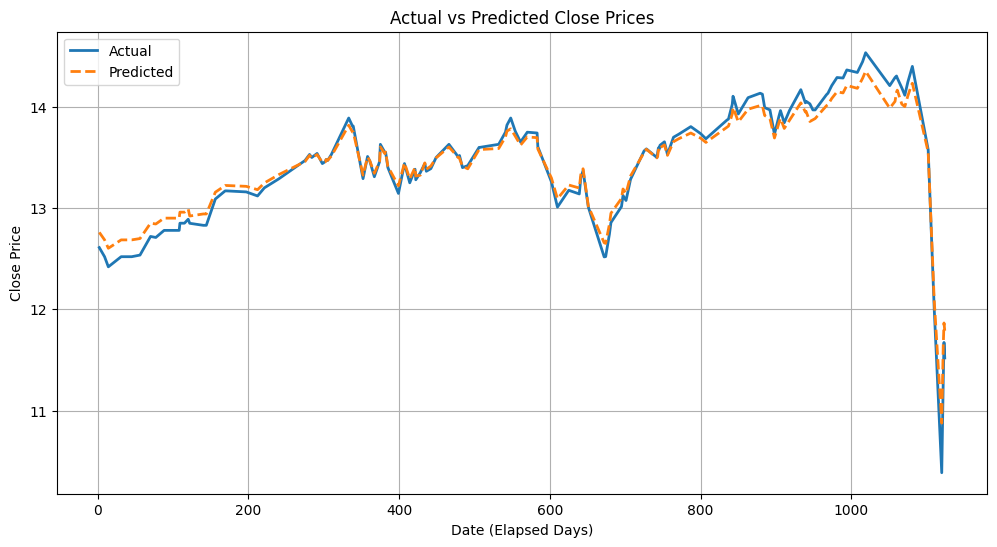

In [9]:
import matplotlib.pyplot as plt

# To use Date for plotting, retrieve it from the original dataset corresponding to the test indices
test_indices = X_test.index
dates_for_test = df.loc[test_indices, 'ElapsedDays']  # Using ElapsedDays as a proxy for Date

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'Date': dates_for_test,
    'Actual': y_test.values,
    'Predicted': y_pred
}).sort_values(by='Date')  # Sort by Date for proper plotting

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', linewidth=2)
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date (Elapsed Days)')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
